## 1. Setup and Imports

In [13]:
!git clone https://github.com/ml-arena/permuted_mnist.git



fatal: destination path 'permuted_mnist' already exists and is not an empty directory.


In [14]:
import sys
sys.path.append('/content/permuted_mnist')



In [15]:
import numpy as np
import time
import matplotlib.pyplot as plt
from typing import Dict, List

# Import the environment and agents
from permuted_mnist.env.permuted_mnist import PermutedMNISTEnv
from permuted_mnist.agent.random.agent import Agent as RandomAgent
from permuted_mnist.agent.linear.agent import Agent as LinearAgent
from permuted_mnist.agent.torch_mlp.agent import Agent as TorchMLP

print("✓ Imports successful")

✓ Imports successful


## 2. Create the Environment

Let's create an environment with 10 different permuted tasks:

In [16]:
# Create environment with 10 episodes (tasks)
env = PermutedMNISTEnv(number_episodes=10)

# Set seed for reproducibility
env.set_seed(42)

print(f"Environment created with {env.number_episodes} permuted tasks")
print(f"Training set size: {env.train_size} samples")
print(f"Test set size: {env.test_size} samples")

Environment created with 10 permuted tasks
Training set size: 60000 samples
Test set size: 10000 samples


## 3. Understanding the Task Structure

Let's examine what a single task looks like:

In [17]:
# Get the first task
task = env.get_next_task()

print("Task structure:")
print(f"- X_train shape: {task['X_train'].shape}")
print(f"- y_train shape: {task['y_train'].shape}")
print(f"- X_test shape: {task['X_test'].shape}")
print(f"- y_test shape: {task['y_test'].shape}")
print(f"\nLabel distribution in training set:")
unique, counts = np.unique(task['y_train'], return_counts=True)
for label, count in zip(unique, counts):
    print(f"  Label {label}: {count} samples")

Task structure:
- X_train shape: (60000, 28, 28)
- y_train shape: (60000, 1)
- X_test shape: (10000, 28, 28)
- y_test shape: (10000,)

Label distribution in training set:
  Label 0: 6131 samples
  Label 1: 6742 samples
  Label 2: 5421 samples
  Label 3: 5851 samples
  Label 4: 6265 samples
  Label 5: 5958 samples
  Label 6: 5949 samples
  Label 7: 5842 samples
  Label 8: 5923 samples
  Label 9: 5918 samples


## 4. Visualize Permuted Images

Let's see how the permutation affects the images:

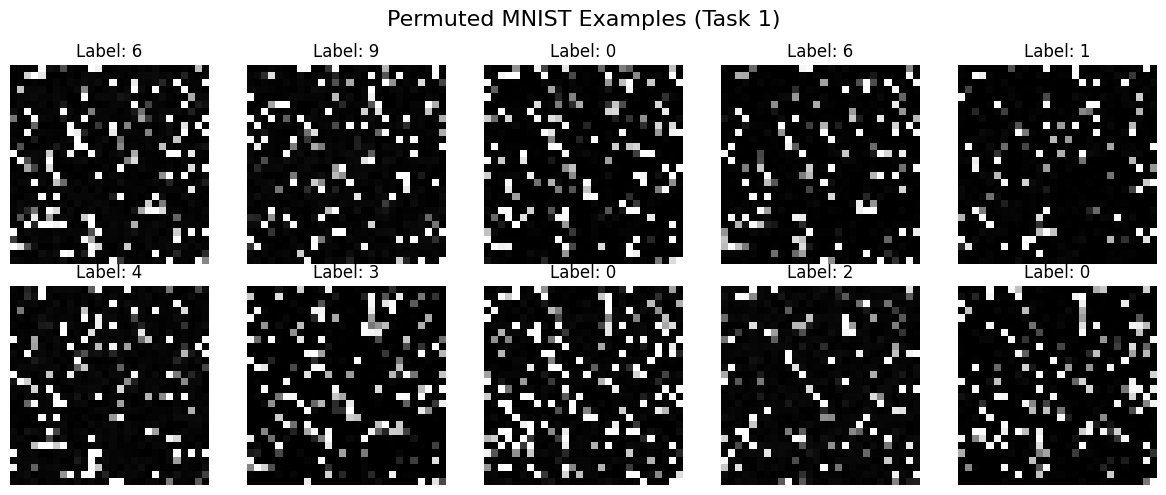

Note: The images look scrambled due to pixel permutation!
The labels are also permuted (not the original MNIST labels).


In [18]:
# Display some examples from the permuted task
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Permuted MNIST Examples (Task 1)', fontsize=16)

for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(task['X_train'][i], cmap='gray')
    ax.set_title(f'Label: {task["y_train"][i][0]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

print("Note: The images look scrambled due to pixel permutation!")
print("The labels are also permuted (not the original MNIST labels).")

## 5. Feature Engineering（there we change hiddenseze=[100,100],batch_size=128,n_epoch=3)

Data standarlization

In [20]:
import numpy as np
import time
from sklearn.preprocessing import StandardScaler, normalize

# Reset environment
env.reset()
env.set_seed(42)

# Create TorchMLP agent
torchmlp = TorchMLP(output_dim=10, seed=42)

# Track performance
torchmlp1_accuracies = []
torchmlp1_times = []

print("Evaluating TorchMLP Agent with Feature Engineering")
print("="*60)

# Evaluate on all tasks
task_num = 1
while True:
    task = env.get_next_task()
    if task is None:
        break

    # Reset agent for new task
    torchmlp.reset()

    # Get task data
    X_train, y_train = task['X_train'], task['y_train']
    X_test, y_test   = task['X_test'], task['y_test']

    # ---------------- Feature Engineering ----------------
    # Flatten images
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test  = X_test.reshape(X_test.shape[0], -1)

    # Standardize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test  = scaler.transform(X_test)
    # ---------------- Train & Evaluate ----------------
    start_time = time.time()
    torchmlp.train(X_train, y_train)
    predictions = torchmlp.predict(X_test)

    elapsed_time = time.time() - start_time
    accuracy = env.evaluate(predictions, y_test)

    torchmlp1_accuracies.append(accuracy)
    torchmlp1_times.append(elapsed_time)

    print(f"Task {task_num}: Accuracy = {accuracy:.2%}, Time = {elapsed_time:.2f}s")
    task_num += 1

print(f"\nTorchMLP Agent Summary with Feature Engineering:")
print(f"  Mean accuracy: {np.mean(torchmlp1_accuracies):.2%} ± {np.std(torchmlp1_accuracies):.2%}")
print(f"  Total time: {np.sum(torchmlp1_times):.2f}s")


Evaluating TorchMLP Agent with Feature Engineering
epoch 0: 0.9552%
epoch 1: 0.9637%
epoch 2: 0.9671%
Task 1: Accuracy = 96.84%, Time = 22.70s
epoch 0: 0.9549%
epoch 1: 0.9646%
epoch 2: 0.9659%
Task 2: Accuracy = 96.56%, Time = 10.11s
epoch 0: 0.9566%
epoch 1: 0.9637%
epoch 2: 0.9651%
Task 3: Accuracy = 96.70%, Time = 9.66s
epoch 0: 0.9563%
epoch 1: 0.9589%
epoch 2: 0.9667%
Task 4: Accuracy = 96.58%, Time = 9.25s
epoch 0: 0.9559%
epoch 1: 0.9623%
epoch 2: 0.9665%
Task 5: Accuracy = 96.94%, Time = 9.05s
epoch 0: 0.9543%
epoch 1: 0.9647%
epoch 2: 0.9649%
Task 6: Accuracy = 96.78%, Time = 9.33s
epoch 0: 0.9572%
epoch 1: 0.9647%
epoch 2: 0.9629%
Task 7: Accuracy = 96.83%, Time = 9.52s
epoch 0: 0.9557%
epoch 1: 0.9660%
epoch 2: 0.9672%
Task 8: Accuracy = 96.81%, Time = 10.84s
epoch 0: 0.9573%
epoch 1: 0.9639%
epoch 2: 0.9673%
Task 9: Accuracy = 96.53%, Time = 12.18s
epoch 0: 0.9535%
epoch 1: 0.9641%
epoch 2: 0.9653%
Task 10: Accuracy = 96.69%, Time = 8.35s

TorchMLP Agent Summary with Featu

 L2 normalization

In [ ]:
import numpy as np
import time
from sklearn.preprocessing import StandardScaler, normalize

# Reset environment
env.reset()
env.set_seed(42)

# Create TorchMLP agent
torchmlp = TorchMLP(output_dim=10, seed=42)

# Track performance
torchmlp2_accuracies = []
torchmlp2_times = []

print("Evaluating TorchMLP Agent with Feature Engineering")
print("="*60)

# Evaluate on all tasks
task_num = 1
while True:
    task = env.get_next_task()
    if task is None:
        break

    # Reset agent for new task
    torchmlp.reset()

    # Get task data
    X_train, y_train = task['X_train'], task['y_train']
    X_test, y_test   = task['X_test'], task['y_test']

    # ---------------- Feature Engineering ----------------
    # Flatten images
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test  = X_test.reshape(X_test.shape[0], -1)

    # L2 normalization
    X_train = normalize(X_train, norm='l2', axis=1)
    X_test  = normalize(X_test, norm='l2', axis=1)

    # ---------------- Train & Evaluate ----------------
    start_time = time.time()
    torchmlp.train(X_train, y_train)
    predictions = torchmlp.predict(X_test)

    elapsed_time = time.time() - start_time
    accuracy = env.evaluate(predictions, y_test)

    torchmlp2_accuracies.append(accuracy)
    torchmlp2_times.append(elapsed_time)

    print(f"Task {task_num}: Accuracy = {accuracy:.2%}, Time = {elapsed_time:.2f}s")
    task_num += 1

print(f"\nTorchMLP Agent Summary with Feature Engineering:")
print(f"  Mean accuracy: {np.mean(torchmlp2_accuracies):.2%} ± {np.std(torchmlp2_accuracies):.2%}")
print(f"  Total time: {np.sum(torchmlp2_times):.2f}s")


Evaluating TorchMLP Agent with Feature Engineering
epoch 0: 0.9645%
epoch 1: 0.9699%
epoch 2: 0.9767%
Task 1: Accuracy = 97.70%, Time = 15.57s
epoch 0: 0.9653%
epoch 1: 0.9728%
epoch 2: 0.9754%
Task 2: Accuracy = 97.90%, Time = 16.18s
epoch 0: 0.9663%
epoch 1: 0.9732%
epoch 2: 0.9744%
Task 3: Accuracy = 97.60%, Time = 19.10s
epoch 0: 0.9645%
epoch 1: 0.9688%
epoch 2: 0.9732%
Task 4: Accuracy = 97.42%, Time = 15.18s
epoch 0: 0.9657%
epoch 1: 0.9733%
epoch 2: 0.9751%
Task 5: Accuracy = 97.50%, Time = 13.73s
epoch 0: 0.9662%
epoch 1: 0.9692%
epoch 2: 0.9743%
Task 6: Accuracy = 97.77%, Time = 13.05s
epoch 0: 0.9641%
epoch 1: 0.9728%
epoch 2: 0.9716%
Task 7: Accuracy = 97.69%, Time = 11.12s


It works well！

Data Augmentation

In [ ]:
import numpy as np
import time
from sklearn.preprocessing import StandardScaler, normalize
from torchvision import transforms
from PIL import Image

# Reset environment
env.reset()
env.set_seed(42)

# Create TorchMLP agent
torchmlp = TorchMLP(output_dim=10, seed=42)

# Track performance
torchmlp3_accuracies = []
torchmlp3_times = []

print("Evaluating TorchMLP Agent with Feature Engineering")
print("="*60)

# Define data augmentation
augment = transforms.Compose([
    transforms.ToPILImage(),                        # convert to PIL
    transforms.RandomRotation(10),                  # rotate ±10 degrees
    transforms.RandomAffine(0, translate=(0.1,0.1)), # shift ±10%
    transforms.ToTensor(),                          # convert to tensor
])

# Evaluate on all tasks
task_num = 1
while True:
    task = env.get_next_task()
    if task is None:
        break

    # Reset agent for new task
    torchmlp.reset()

    # Get data
    X_train, y_train = task['X_train'], task['y_train']
    X_test, y_test   = task['X_test'], task['y_test']

    # ---------------- Data Augmentation ----------------
    augmented_X = []
    augmented_y = []
    for i in range(len(X_train)):
        img = X_train[i]
        label = y_train[i]

        # Apply 2 augmentations per image (adjust as needed)
        for _ in range(2):
            aug_img = augment(img).numpy().reshape(28,28)
            augmented_X.append(aug_img)
            augmented_y.append(label)

    # Combine original + augmented data
    X_train = np.concatenate([X_train, np.array(augmented_X)], axis=0)
    y_train = np.concatenate([y_train, np.array(augmented_y)], axis=0)

    # ---------------- Train & Evaluate ----------------
    start_time = time.time()
    torchmlp.train(X_train, y_train)
    predictions = torchmlp.predict(X_test)

    elapsed_time = time.time() - start_time
    accuracy = env.evaluate(predictions, y_test)

    torchmlp3_accuracies.append(accuracy)
    torchmlp3_times.append(elapsed_time)

    print(f"Task {task_num}: Accuracy = {accuracy:.2%}, Time = {elapsed_time:.2f}s")
    task_num += 1

print(f"\nTorchMLP Agent Summary with Feature Engineering:")
print(f"  Mean accuracy: {np.mean(torchmlp3_accuracies):.2%} ± {np.std(torchmlp3_accuracies):.2%}")
print(f"  Total time: {np.sum(torchmlp3_times):.2f}s")


It takes longtime but output a disappointed accuracy.

As float 0-1

In [ ]:
import numpy as np
import time
from sklearn.preprocessing import StandardScaler, normalize

# Reset environment
env.reset()
env.set_seed(42)

# Create TorchMLP agent
torchmlp = TorchMLP(output_dim=10, seed=42)

# Track performance
torchmlp4_accuracies = []
torchmlp4_times = []

print("Evaluating TorchMLP Agent with Feature Engineering")
print("="*60)

# Evaluate on all tasks
task_num = 1
while True:
    task = env.get_next_task()
    if task is None:
        break

    # Reset agent for new task
    torchmlp.reset()

    # Get task data
    X_train, y_train = task['X_train'], task['y_train']
    X_test, y_test   = task['X_test'], task['y_test']

    # ---------------- Feature Engineering ----------------
    # Flatten images
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test  = X_test.reshape(X_test.shape[0], -1)

    X_train = X_train.astype(np.float32) / 255.0
    X_test  = X_test.astype(np.float32) / 255.0

    # L2 normalization
    X_train = normalize(X_train, norm='l2', axis=1)
    X_test  = normalize(X_test, norm='l2', axis=1)

    # ---------------- Train & Evaluate ----------------
    start_time = time.time()
    torchmlp.train(X_train, y_train)
    predictions = torchmlp.predict(X_test)

    elapsed_time = time.time() - start_time
    accuracy = env.evaluate(predictions, y_test)

    torchmlp4_accuracies.append(accuracy)
    torchmlp4_times.append(elapsed_time)

    print(f"Task {task_num}: Accuracy = {accuracy:.2%}, Time = {elapsed_time:.2f}s")
    task_num += 1

print(f"\nTorchMLP Agent Summary with Feature Engineering:")
print(f"  Mean accuracy: {np.mean(torchmlp4_accuracies):.2%} ± {np.std(torchmlp4_accuracies):.2%}")
print(f"  Total time: {np.sum(torchmlp4_times):.2f}s")


It works well！

L2 normalization + as float 0-1

In [ ]:
import numpy as np
import time
from sklearn.preprocessing import StandardScaler, normalize

# Reset environment
env.reset()
env.set_seed(42)

# Create TorchMLP agent
torchmlp = TorchMLP(output_dim=10, seed=42)

# Track performance
torchmlp5_accuracies = []
torchmlp5_times = []

print("Evaluating TorchMLP Agent with Feature Engineering")
print("="*60)

# Evaluate on all tasks
task_num = 1
while True:
    task = env.get_next_task()
    if task is None:
        break

    # Reset agent for new task
    torchmlp.reset()

    # Get task data
    X_train, y_train = task['X_train'], task['y_train']
    X_test, y_test   = task['X_test'], task['y_test']

    # ---------------- Feature Engineering ----------------
    # Flatten images
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test  = X_test.reshape(X_test.shape[0], -1)

    X_train = X_train.astype(np.float32) / 255.0
    X_test  = X_test.astype(np.float32) / 255.0

    # ---------------- Train & Evaluate ----------------
    start_time = time.time()
    torchmlp.train(X_train, y_train)
    predictions = torchmlp.predict(X_test)

    elapsed_time = time.time() - start_time
    accuracy = env.evaluate(predictions, y_test)

    torchmlp5_accuracies.append(accuracy)
    torchmlp5_times.append(elapsed_time)

    print(f"Task {task_num}: Accuracy = {accuracy:.2%}, Time = {elapsed_time:.2f}s")
    task_num += 1

print(f"\nTorchMLP Agent Summary with Feature Engineering:")
print(f"  Mean accuracy: {np.mean(torchmlp5_accuracies):.2%} ± {np.std(torchmlp5_accuracies):.2%}")
print(f"  Total time: {np.sum(torchmlp5_times):.2f}s")


In [ ]:
# Create comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
tasks = np.arange(1, len(random_accuracies) + 1)
ax1.plot(tasks, torchmlp1_accuracies, 'o-', label='Standardization', alpha=0.7, linewidth=2)
ax1.plot(tasks, torchmlp2_accuracies, 's-', label='Regularization', alpha=0.7, linewidth=2)
ax1.plot(tasks, torchmlp3_accuracies, '^-', label='Data Augmentation', alpha=0.7, linewidth=2)
ax1.plot(tasks, torchmlp4_accuracies, 'D-', label='ad float 01', alpha=0.7, linewidth=2)
ax1.plot(tasks, torchmlp5_accuracies, '*-', label='Regularization + as float 01', alpha=0.7, linewidth=2)
ax1.set_xlabel('Task Number')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy per Task')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# Time comparison
ax2.bar(tasks-0.4, torchmlp1_times, 0.4, label='Standardization', alpha=0.7)
ax2.bar(tasks-0.2, torchmlp2_times, 0.4, label='Regularization', alpha=0.7)
ax2.bar(tasks, torchmlp3_times,0.4, label='Data Augmentation', alpha=0.7)
ax2.bar(tasks+0.2, torchmlp4_times, 0.4, label='ad float 01', alpha=0.7)
ax2.bar(tasks+0.4, torchmlp5_times, 0.4, label='Regularization + as float 01', alpha=0.7, linewidth=2)
ax2.axhline(y=60, color='red', linestyle='--', alpha=0.5, label='1 minute threshold')
ax2.set_xlabel('Task Number')
ax2.set_ylabel('Time (seconds)')
ax2.set_title('Training + Prediction Time per Task')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()